In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np


# load data into pandas DataFrame
data = pd.read_csv(r'C:\Users\33670\Desktop\framework\data_collection\historical_data\strat1.csv')
#data = data.drop('open', axis=1)
data = data[data['market_cap'] > 1000000000]
data.shape

(45702, 16)

In [2]:
data['ticker'] = data["ticker"].astype("category")
print(data.dtypes)

ticker                                         category
open                                            float64
above_20sma                                        bool
green_days                                      float64
red_days                                        float64
from_pm_high_to_open                            float64
gap                                             float64
market_cap                                      float64
number_of_red_candles_one_hour_before_open      float64
percent_of_red_candles_one_hour_before_open     float64
pm_float_rotation                               float64
pm_dollar_volume                                float64
sigma_percent                                   float64
to_predict                                         bool
entries                                         float64
exits                                           float64
dtype: object


In [3]:
data.describe()

,green_days,red_days,first_hour_max_down,first_hour_move,from_pm_high_to_open,gap,market_cap,number_of_red_candles_one_hour_before_open,percent_of_red_candles_one_hour_before_open,pm_float_rotation,sigma_percent,pm_dollar_volume
count,45702.000000,45702.000000,45702.000000,45702.000000,35869.000000,45702.000000,4.570200e+04,35869.000000,35869.000000,3.295700e+04,45702.000000,3.586900e+04
mean,0.963722,0.965866,-0.010475,0.000034,-0.007581,-0.000825,1.244170e+11,5.472804,0.228031,1.438193e-04,0.043591,2.373320e+07
std,1.347013,1.334535,0.011694,0.015702,0.011461,0.016851,2.794163e+11,8.071929,0.218336,1.406885e-03,0.033505,1.263081e+08
min,0.000000,0.000000,-0.198795,-0.193253,-0.231911,-0.296635,1.000328e+09,0.000000,0.000000,4.985275e-09,0.001110,2.240000e+02
25%,0.000000,0.000000,-0.013706,-0.006944,-0.010754,-0.007479,1.356496e+10,0.000000,0.000000,3.042383e-06,0.023235,1.352627e+05
50%,0.000000,0.000000,-0.007052,0.000123,-0.004796,-0.000394,4.107207e+10,2.000000,0.217391,1.206058e-05,0.034424,6.501499e+05
75%,1.000000,1.000000,-0.003014,0.006986,-0.001202,0.005780,1.325205e+11,7.000000,0.352941,6.485399e-05,0.052402,3.538695e+06
max,12.000000,11.000000,0.000000,0.265227,0.179231,0.795620,2.825000e+12,45.000000,1.000000,1.954773e-01,0.660244,4.093090e+09


In [4]:
# separate features and target variable
X = data.drop(['strat1','first_hour_move', 'first_hour_max_down'], axis=1)
y = data['strat1']

In [5]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [6]:
# define the XGBoost classifier model
model = xgb.XGBClassifier()

In [7]:
# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [8]:
# set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'eta': 0.1
}

# train the XGBoost model
model = xgb.train(params=params, dtrain=dtrain_reg, num_boost_round=100)


In [9]:
# make predictions on the test set
y_pred = model.predict(dtest_reg)

In [10]:
# evaluate model performance
accuracy = accuracy_score(y_test, y_pred.round())

print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 83.81%


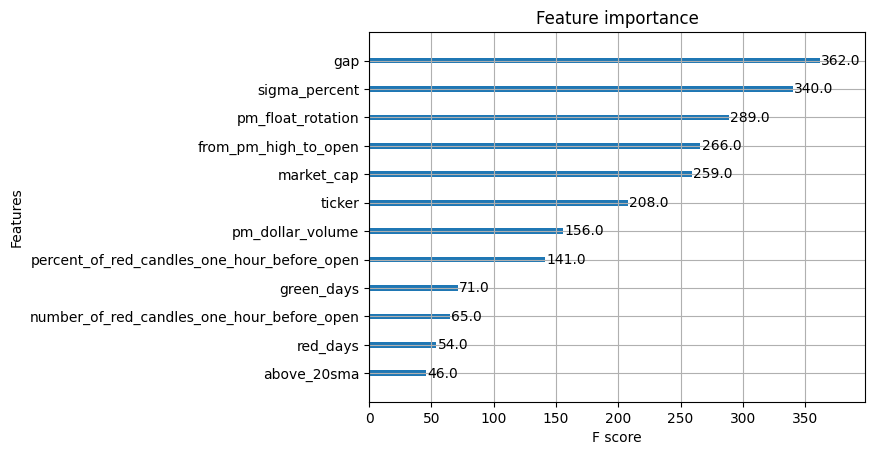

In [11]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

# PnL Calculation

In [12]:
# calcule la PnL
X_test['pred'] = y_pred
X_test['strat1'] = y_test
X_test = X_test.join(data['first_hour_move'], how='inner')
X_test = X_test.join(data['first_hour_max_down'], how='inner')

In [13]:
"""
# first hour config.
number_of_trades = 0
pnl = 0
for index, row in X_test.iterrows():
    if row['pred'] > 0.5:
        number_of_trades +=1
        if row['strat1'] == True:
            pnl += 1.5
        elif row['first_hour_max_down'] > -0.01:
            pnl = 100*row['first_hour_move']
        else:
            pnl -= 1

print(number_of_trades)
print(pnl)
"""

509
7.71766917293233


In [14]:
X_test.shape

(2700, 16)

# Test on additionnal data

In [12]:
data_test = pd.read_csv(r'C:\Users\33670\Desktop\framework\data_collection\historical_data\strat1_test.csv')

In [13]:
data_test['ticker'] = data_test["ticker"].astype("category")
print(data_test.dtypes)

ticker                                         category
above_20sma                                        bool
green_days                                      float64
red_days                                        float64
from_pm_high_to_open                            float64
gap                                             float64
market_cap                                      float64
number_of_red_candles_one_hour_before_open      float64
percent_of_red_candles_one_hour_before_open     float64
pm_float_rotation                               float64
sigma_percent                                   float64
strat1                                             bool
pm_dollar_volume                                float64
dtype: object


In [14]:
X_test2 = data_test.drop('strat1', axis=1)
y_test2 = data_test['strat1']

In [15]:
dtest_reg2 = xgb.DMatrix(X_test2, y_test2, enable_categorical=True)

In [16]:
y_pred_test = model.predict(dtest_reg2)

In [17]:
accuracy = accuracy_score(y_test2, y_pred_test.round())
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 83.97%


In [19]:
data_test['pred'] = y_pred_test

In [36]:
data_test[data_test['pred']>0.6].shape

(200, 14)

In [37]:
data_test[data_test['pred']>0.6][data_test['strat1'] == True].shape

C:\Users\33670\AppData\Local\Temp\ipykernel_1636\4038829011.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test[data_test['pred']>0.6][data_test['strat1'] == True].shape


(105, 14)

In [39]:
data_test[data_test['strat1'] == True][data_test['pred']>0.6].shape

C:\Users\33670\AppData\Local\Temp\ipykernel_1636\3715162864.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test[data_test['strat1'] == True][data_test['pred']>0.6].shape


(105, 14)

In [29]:
y_test2

0        False
1        False
2        False
3        False
4         True
         ...  
22846     True
22847    False
22848    False
22849     True
22850     True
Name: strat1, Length: 22851, dtype: bool